In [20]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [21]:
output = "NBA_output.csv"
df = pd.read_csv(output)
df = df.drop(df.columns[[0]], axis=1)
df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary
0,17,Justin Anderson,25.7,4,G-F,-28.632562,2516048
1,49,DeAndre' Bembry,25.0,3,G-F,10.801852,1634640
2,94,Vince Carter,42.5,21,G-F,-2.526068,1512601
3,119,Allen Crabbe,27.3,6,G-F,-14.052688,18500000
4,281,Damian Jones,24.0,3,C,0.000000,1544951


In [22]:
df["Position"].value_counts()

G      98
F      85
C      37
G-F    23
F-C    14
C-F    12
F-G     9
Name: Position, dtype: int64

In [23]:
#df["Position"].replace("G-F", "G", inplace=True)
#df["Position"].replace("F-C", "F", inplace=True)
#df["Position"].replace("C-F", "C", inplace=True)
#df["Position"].replace("F-G", "F", inplace=True)

In [24]:
df["Position"].value_counts()

G      98
F      85
C      37
G-F    23
F-C    14
C-F    12
F-G     9
Name: Position, dtype: int64

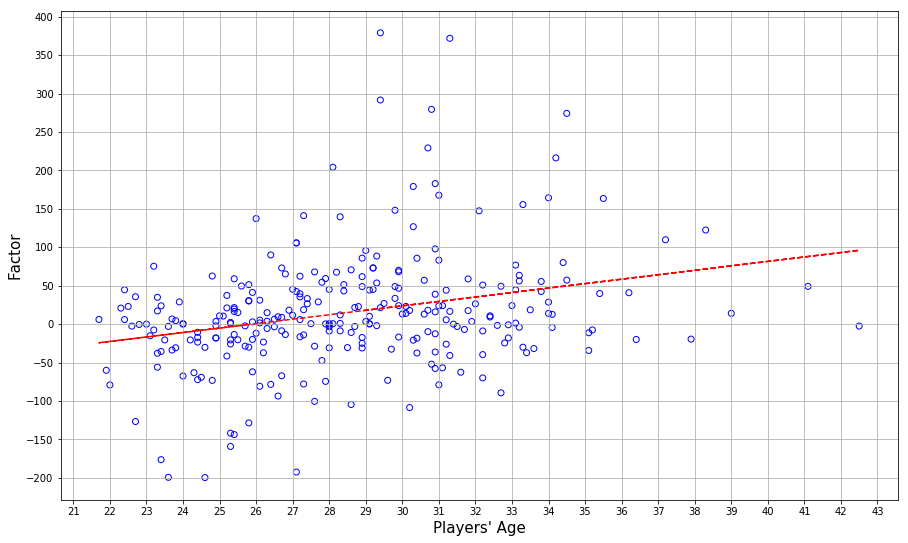

In [25]:
x = df["Age"]
y = df["Factor"]

x_axis = np.arange(21, 44)
y_axis = np.arange(-200, 450, 50)

plt.scatter(x, y, facecolors = "none", edgecolors = "blue")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

fig = plt.gcf()
fig.set_size_inches(15, 9)
plt.xticks(x_axis)
plt.yticks(y_axis)
plt.xlabel("Players' Age", fontsize = 15)
plt.ylabel("Factor", fontsize = 15)
plt.grid()
plt.show()

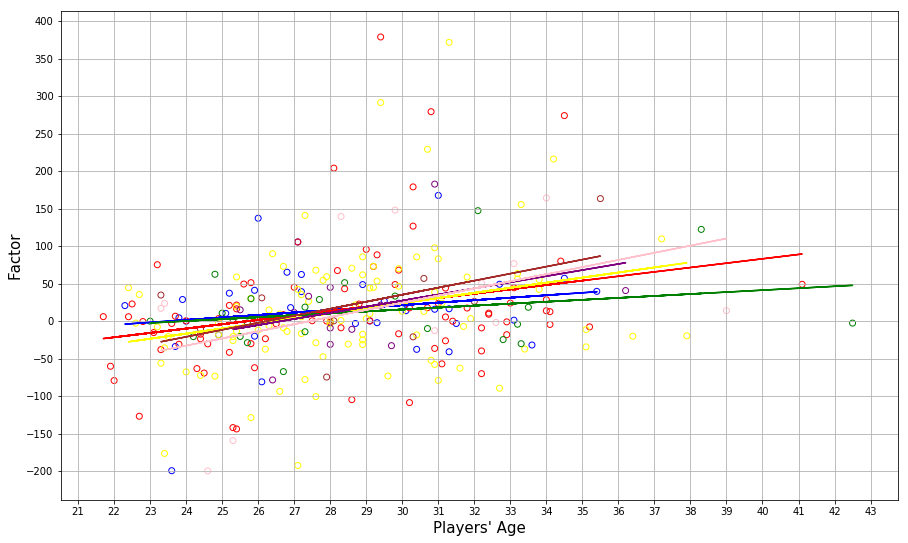

In [36]:
c = df.loc[df["Position"] == "C"]
f = df.loc[df["Position"] == "F"]
g = df.loc[df["Position"] == "G"]
gf = df.loc[df["Position"] == "G-F"]
fc = df.loc[df["Position"] == "F-C"]
cf = df.loc[df["Position"] == "C-F"]
fg = df.loc[df["Position"] == "F-G"]

x1 = c["Age"]
y1 = c["Factor"] 
x2 = f["Age"]
y2 = f["Factor"]
x3 = g["Age"]
y3 = g["Factor"]
x4 = gf["Age"]
y4 = gf["Factor"]
x5 = fc["Age"]
y5 = fc["Factor"]
x6 = cf["Age"]
y6 = cf["Factor"]
x7 = fg["Age"]
y7 = fg["Factor"]

plt.scatter(x1, y1, facecolors = "none", edgecolors = "blue")
fig2 = plt.gcf()
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"b-")

ax2 = fig2.add_subplot(111)
ax2.scatter(x2, y2, facecolors = "none", edgecolors = "red")
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2),"r-")

ax3 = fig2.add_subplot(111)
ax3.scatter(x3, y3, facecolors = "none", edgecolors = "yellow")
z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)
plt.plot(x3,p3(x3),"-", color = "yellow")

ax4 = fig2.add_subplot(111)
ax4.scatter(x4, y4, facecolors = "none", edgecolors = "green")
z4 = np.polyfit(x4, y4, 1)
p4 = np.poly1d(z4)
plt.plot(x4,p4(x4),"g-") 

ax5 = fig2.add_subplot(111)
ax5.scatter(x5, y5, facecolors = "none", edgecolors = "purple")
z5 = np.polyfit(x5, y5, 1)
p5 = np.poly1d(z5)
plt.plot(x5,p5(x5),"-", color = "purple") 

ax6 = fig2.add_subplot(111)
ax6.scatter(x6, y6, facecolors = "none", edgecolors = "pink")
z6 = np.polyfit(x6, y6, 1)
p6 = np.poly1d(z6)
plt.plot(x6,p6(x6),"-", color = "pink") 

ax7 = fig2.add_subplot(111)
ax7.scatter(x7, y7, facecolors = "none", edgecolors = "brown")
z7 = np.polyfit(x7, y7, 1)
p7 = np.poly1d(z7)
plt.plot(x7,p7(x7),"-", color = "brown") 

plt.xticks(x_axis)
plt.yticks(y_axis)
plt.xlabel("Players' Age", fontsize = 15)
plt.ylabel("Factor", fontsize = 15)

fig2.set_size_inches(15, 9)
positions = ["C", "F", "G"]
plt.grid()
plt.show()